<a href="https://colab.research.google.com/github/cooperlee0412/ECE570FinalProject/blob/main/3D_DDPM_Result_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.8/336.8 kB 23.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

  0%|          | 1/5000 [00:00<57:01,  1.46it/s]

Epoch 0: Loss = 1.4806


 10%|█         | 501/5000 [02:53<34:17,  2.19it/s]

Epoch 500: Loss = 0.0827


 20%|██        | 1001/5000 [05:46<21:50,  3.05it/s]

Epoch 1000: Loss = 0.0212


 30%|███       | 1501/5000 [08:46<18:50,  3.10it/s]

Epoch 1500: Loss = 0.0171


 40%|████      | 2001/5000 [11:47<23:16,  2.15it/s]

Epoch 2000: Loss = 0.8969


 50%|█████     | 2501/5000 [14:46<15:10,  2.74it/s]

Epoch 2500: Loss = 0.0111


 60%|██████    | 3001/5000 [17:47<10:47,  3.09it/s]

Epoch 3000: Loss = 0.0102


 70%|███████   | 3501/5000 [20:45<08:28,  2.95it/s]

Epoch 3500: Loss = 0.0517


 80%|████████  | 4001/5000 [23:44<05:35,  2.98it/s]

Epoch 4000: Loss = 0.0073


 90%|█████████ | 4501/5000 [26:42<02:44,  3.03it/s]

Epoch 4500: Loss = 0.1178


100%|██████████| 5000/5000 [29:46<00:00,  2.80it/s]


Generating 3D cube...


Generating: 500it [00:52,  9.52it/s]


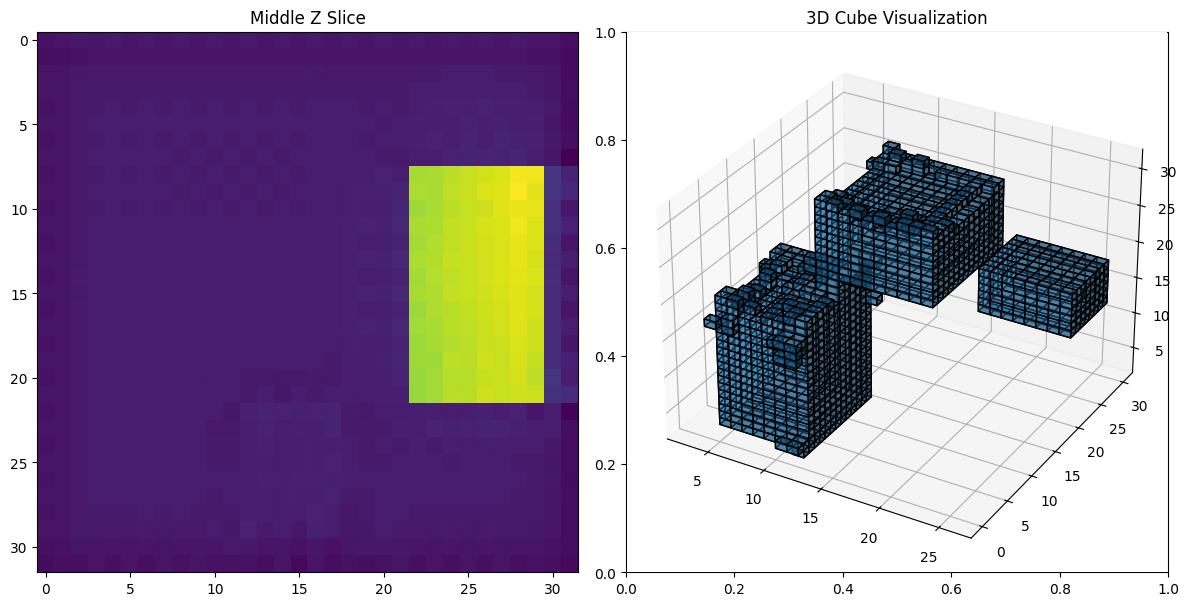

Done! Saved as 'generated_cube.obj'


In [ ]:
!pip install torch numpy matplotlib PyMCubes
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import mcubes

# Enhanced DDPM for 3D
class DDPM3D:
    def __init__(self, model, timesteps=500, beta_start=0.0001, beta_end=0.02):
        self.model = model
        self.timesteps = timesteps
        self.betas = torch.linspace(beta_start, beta_end, timesteps)
        self.alphas = 1. - self.betas
        self.alpha_bars = torch.cumprod(self.alphas, dim=0)

    def forward_process(self, x_0, t):
        noise = torch.randn_like(x_0)
        sqrt_alpha_bar = torch.sqrt(self.alpha_bars[t])[:, None, None, None, None]
        sqrt_one_minus_alpha_bar = torch.sqrt(1. - self.alpha_bars[t])[:, None, None, None, None]
        noisy = sqrt_alpha_bar * x_0 + sqrt_one_minus_alpha_bar * noise
        return noisy, noise

    def reverse_process(self, x, t):
        with torch.no_grad():
            pred_noise = self.model(x)
        x_prev = (x - self.betas[t] * pred_noise / torch.sqrt(1 - self.alpha_bars[t])) / torch.sqrt(self.alphas[t])
        return x_prev

# More powerful 3D U-Net
class UNet3D(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.down1 = torch.nn.Sequential(
            torch.nn.Conv3d(1, 32, 3, padding=1),
            torch.nn.BatchNorm3d(32),
            torch.nn.ReLU())
        self.down2 = torch.nn.Sequential(
            torch.nn.Conv3d(32, 64, 3, stride=2, padding=1),
            torch.nn.BatchNorm3d(64),
            torch.nn.ReLU())
        self.middle = torch.nn.Sequential(
            torch.nn.Conv3d(64, 64, 3, padding=1),
            torch.nn.BatchNorm3d(64),
            torch.nn.ReLU())
        self.up1 = torch.nn.Sequential(
            torch.nn.ConvTranspose3d(64, 32, 3, stride=2, padding=1, output_padding=1),
            torch.nn.BatchNorm3d(32),
            torch.nn.ReLU())
        self.out = torch.nn.Conv3d(32, 1, 3, padding=1)

    def forward(self, x):
        x1 = self.down1(x)
        x2 = self.down2(x1)
        x = self.middle(x2)
        x = self.up1(x + x2)  # Skip connection
        return self.out(x + x1)  # Skip connection

# Generate perfect cube data
def generate_cube(size=32, noise_level=0.0):
    cube = torch.zeros(size, size, size)
    margin = size // 4
    cube[margin:-margin, margin:-margin, margin:-margin] = 1.0
    if noise_level > 0:
        cube += noise_level * torch.randn_like(cube)
    return cube.unsqueeze(0).unsqueeze(0)

# Initialize model and optimizer
model = UNet3D()
ddpm = DDPM3D(model, timesteps=500)
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-4)

# Training loop with progress monitoring
print("Training DDPM on 32×32×32 cubes...")
for epoch in tqdm(range(5000)):  # Increased iterations
    optimizer.zero_grad()

    # Generate clean cube with slight noise augmentation
    x_0 = generate_cube(size=32, noise_level=0.1)

    # Random timestep
    t = torch.randint(0, ddpm.timesteps, (1,))

    # Forward process
    x_t, noise = ddpm.forward_process(x_0, t)

    # Predict and compute loss
    pred_noise = model(x_t)
    loss = torch.mean((pred_noise - noise)**2)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Print loss every 500 steps
    if epoch % 500 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

# Generation function with progress bar
def sample(ddpm, shape=(1, 1, 32, 32, 32)):
    x = torch.randn(shape)
    for t in tqdm(reversed(range(ddpm.timesteps)), desc="Generating"):
        x = ddpm.reverse_process(x, t)
    return x

# Generate and visualize
print("Generating 3D cube...")
generated_cube = sample(ddpm)

# Save mesh with adaptive threshold
voxel_grid = generated_cube.squeeze().detach().cpu().numpy()
threshold = np.percentile(voxel_grid, 90)  # Adaptive threshold
vertices, triangles = mcubes.marching_cubes(voxel_grid, threshold)
mcubes.export_obj(vertices, triangles, 'generated_cube.obj')

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Middle slice
ax1.imshow(voxel_grid[16, :, :], cmap='viridis')
ax1.set_title("Middle Z Slice")

# 3D rendering
ax2 = fig.add_subplot(122, projection='3d')
ax2.voxels(voxel_grid > threshold, edgecolor='k', alpha=0.5)
ax2.set_title("3D Cube Visualization")
plt.tight_layout()
plt.show()

print("Done! Saved as 'generated_cube.obj'")